# Guide 2: Public Cloud Storage with Microsoft Azure

Public Cloud storage is the service that allow you to keep data on a remote server. You can use your documents but instead of querying them from folders saved in your hardware, they are secure in another place depending from the location you choose for your Azure Storage Account. The main reason for learning how to use storage are that a) it allows for an integrate use of the cloud computing softwares (SaaS) available from the provider and b) it allows to store up 195 GB in each container for an ideally ulimited number of containers (max size 4,7 Terabyte).

It is somehow expensive but convenient unless you want to scale your infrastructure every time you need to, incurring in costs that might be avoid in the future. Let say you have 1 terabyte large folder containing your last survey, and you want to save it somewhere. With a remote storage you will spend way less than buying a new storage, second it sounds more likely that your hard drive crush than a datacenter collapse. Using the storage, you can move files from your local hard drive to remote server. These will be stored inside your Microsoft Azure storage account simply by using applications designed with friendly user interface or using a software development kit (SDK) for Python. In this guide your are going to learn how to do that.

Through this guide, you will learn: a) basic of the Microsoft Azure Storage Account service, b) how to use applications for uploading files (i.e. Storage Explorer), c) how to use Azure SDK for Python and its modules functionalities (i.e. azure.storage module). To complete this guide should not take more than 30 minutes.

# Table of Contents
* [Guide 2: Public Cloud Storage with Microsoft Azure](#Guide-2:-Public-Cloud-Storage-with-Microsoft-Azure)
    * [Cloud storage and cloud computing](#Cloud-storage-and-cloud-computing)
    * [Azure storage account basics](#Azure-storage-account-basics)
    * [Security in the cloud](#Security-in-the-cloud)
    * [Access Azure cloud storage with Storage Explorer UI](#Access-Azure-cloud-storage-with-Storage-Explorer-UI)
        * [Set up Storage Explorer](#Set-up-Storage-Explorer)
        * [Create BLOB container with Storage Explorer](#Create-BLOB-container-with-Storage-Explorer)
        * [Upload BLOBs with Storage Explorer](#Upload-BLOBs-with-Storage-Explorer)
    * [Access Azure cloud storage with Python SDK](#Access-Azure-cloud-storage-with-Python-SDK)
        * [Azure.storage.blob module overview](#Azure.storage.blob-module-overview)
        * [Create BLOB container with Python SDK](#Create-BLOB-container-with-Python-SDK)
        * [Upload BLOBs with Python SDK](#Upload-BLOBs-with-Python-SDK)
        * [Read BLOBs in container with Python SDK](#Read-BLOBs-in-container-with-Python-SDK)
            * [Display images](#Display-images)
            * [Play audios](#Play-audios)
            * [Read datasets](#Read-datasets)
    * [Recap](#Recap)
        *  [What you have learnt](#What-you-have-learnt)
        *  [What you will learn next guide](#What-you-will-learn-next-guide)

## Cloud storage and cloud computing

Terms like “cloud storage” and “cloud computing” are sometimes used interchangeably. One might be tempted to think they have the same meaning, but this is not truth. They are different services eventhough they derived from the same source: the cloud. The public cloud storage is a system that allows you to store data on the Internet, as you would save on your own computer. Some popular examples are Google Drive, DropBox, or iCloud, for which the definition of cloud storage remains the same. Cloud computing, on the other hand, is used to work on and complete specified projects. Cloud computing is linked with cloud storage in that you have to move data to the cloud storage before you can make use of cloud computing softwares. In the next part of the guide we are going to show you how to use the Microsoft's object storage solution called **Azure Storage Account**.

## Azure storage account basics

Azure storage account is Microsoft's solution for the cloud and it stores massive amounts of unstructured data, such as text or binary data. This storage is ideal for serving images or documents directly to a browser, for storing files for distributed access and in our case for analysis by an Azure-hosted service. Objects in the storage can be accessed from anywhere in the world via HTTP or HTTPS. We are going to access BLOB storage both via the Storage Explorer application and URLs using the Azure Storage SDK for Python.

As detailed in the Azure storage account documentation, the service uses three resources ([Intro Storage Account](https://docs.microsoft.com/en-us/azure/storage/blobs/storage-blobs-introduction#blob-service-concepts)): your storage account, the containers in the account, and the blobs in a container. The following diagram shows the relationship between these three resources.

![public_cloud_storage_concepts](img/public_cloud_storage_concepts.png)

 - The **Storage Account** provides a unique namespace to store and access your Azure Storage data objects. All objects in a storage account are billed together as a group. By default, the data in your account is available only to you. [add link to price]
 - The **Container** provides a grouping of a set of blobs. All blobs must be in a container. It is similar to a folder in a file system.
 - The **Blob**, Binary Large OBject (BLOB), is a collection of binary data stored as a single entity in a database management system [[wiki/Binary_large_object](https://en.wikipedia.org/wiki/Binary_large_object)]. Blobs are typically images, audio or other multimedia objects, though sometimes binary executable code is stored as a blob. Azure Storage offers *three types of blobs*: block blobs, page blobs, and append blobs.  Page blobs are primarily used for the VHD files used to back IaaS VMs. Append blobs are used for logging, such as when you want to write to a file and then keep adding more information. Most objects stored in Blob storage are block blobs.Block blobs are ideal for storing text or binary files, such as documents and media files. We are going to use Block blobs. Block blobs can be as large as 4.7 TB, and can be anything from Excel spreadsheets to large video files.
 
_NOTE: In case you wonder how much the storage will cost you. Check this link out[[Azure Storage princing](https://azure.microsoft.com/en-us/pricing/details/storage/)]. In our experience while building this tutorial we have not been able to consume more then 5% of the amount available in the free account._
 
## Security in the cloud

Eventhough data security is out of scope for the present guide, we provide links to the current policy at Harvard [[Link to Harvard Data Policy](https://policy.security.harvard.edu/)] as well as the one from Azure [[Link to Azure Data Security](https://docs.microsoft.com/en-us/azure/security/azure-security)]. We encourage you to have a look before you start a research that involves using sensable data to check requirements and services.

## Access Azure cloud storage with Storage Explorer UI

### Set up Storage Explorer

Before to upload files to the storage account you deployied in the previous guide, you need to a) download and install the cross platform Storage Explore and b) link the application to your account. Storage Explore allows users to upload blobs to a container to the cloud. We are going to show how to do that by setting yourFollow the next steps to install the application and to link your account to Storage Explorer:

- Go to https://azure.microsoft.com/en-us/features/storage-explorer/ and select your operating system and download Storage Explorer

![download_storage_explorer](img/public_cloud_download_storage_explorer.PNG)

- Go to the Downloads folder (or to the folder where you download the app), and double click on the Storage Explorer application to install it. Agree to the terms.

![install_storage_explorer](img/public_cloud_install_storage_explorer.PNG)

- Once the installation is completed let us launch the application. Go to Azure Dashboard and click on your storage account. On the top bar in the application Click on **`Open in Explorer`**. Choose to open the storage on Storage Explorer.

![setup_storage_explorer](img/public_cloud_setup_storage_explorer.PNG)

- You are now looking at the Storage Explorer User Interface. On the vertical bar on the left click on the icon with the shape of plug as shown in the snapshoot below to link the application with your storage account.

![setup_storage_explorer](img/public_cloud_connect_storage_and_explorer.PNG)

- Now it is time to link your storage account using your storage account name and key previously saved:
    - Select use a storage account and key, then click on **`Next`**
    - Add your storage account name and the key, then click on **`Next`**
    - On the connect summary tab, click on **`Connect`**
    
![public_cloud_upload_file_ABS](img/public_cloud_upload_file_ABS.png)

### Create BLOB container with Storage Explorer

Cool, you are now connected to your Azure Storage Account. From the user interface you can manage your storage accounts. The tab on the top left allow to connect to your Microsoft Azure account to synchronize all the containers at once. It also allows to manually connect to other storage accounts. The tab on bottom shows your storage account folder and the underpinning folders the most important for us: Blob Containers.

![manage_storage](img/public_cloud_manage_storage.PNG)

Use Blob Containers to create and manage your containers and to upload your files in the storage. Do the follow:

- Right click on **`Blob Containers`** icon, then click on **`Create Blob Containers`** and type in a name for your container. 

![create_container](img/public_cloud_create_container.PNG)

You will see the newly create container in the folder's tree (in my case it is called mynamecontainer). In the container's interface the commands in the top right frame allow you to interact with its contents (BlOBs) and to see some details, while those in the bottom left allows you to delete, create and in general to manage containers. 

![manage_container](img/azure_storage_manage_container.PNG)

The next step set the container to public access. By making the container public you will no need a key to access contents:

- Right click on your container, click on **`Public Access Level`**. From the tab that opens, select the option public read access and apply. In the activities tab you will see if you succesfully set the public access. 

![set_container_public_access](img/public_cloud_set_container_public_access.PNG)


### Upload BLOBs with Storage Explorer

Write text, Write text, Write text, Write text.

Do this:

- Click on **`Upload Files`**, then (put some images random in data). To select your file from the folder click on **`[..]`**, select **`Block Blob`** as blob type and then **`Upload`**. To display the BLOBs, double click on the files listed.

![upload_blobs](img/public_cloud_upload_blobs.PNG)

In [4]:
#DELETE THIS CELL BEFORE REALISING THE GUIDE!
#retrive keys from my local machine
import pickle
with open('C:/Users/popor/Desktop/azure_services_keys_v1.1.json', 'rb') as handle:
    azure_keys = pickle.load(handle)
    
azure_keys['STORAGE']

{'NAME': 'cloudcomputingplayground',
 'API_KEY': 'ItdsjxJIAo0DGyShdBBiQotdEZ+u4SgMhTNQtDtFAY3rupviiam0k/EyxwOA+taDwAaJcNGKADpEjAJN3fBLww=='}

## Access Azure cloud storage with Python SDK
### Azure.storage.blob module overview

There are several reasons for why you should use the SDK instead of the UI to use the Storage Explorer. We are convinced that you might want to learn this in case you want to build real world applications using cloud computing services. You will get a taste of it when using the experiment's guides. One thing is to follow directions, another is to navigate in obscure ocean. Knowing a lil of SDK will save you _a lot_ of time. Below you can find some reasons:

1. Automate repetitive processes 
2. Integrate your output with tools for statistical analysis (and machine learning)
3. Extensive documentation to use SDK for Python ([SDK doc](http://azure.github.io/azure-storage-python/ref/azure.storage.blob.html))
4. Case examples and large community of developers/contributors ([sample code](https://azure.microsoft.com/en-us/resources/samples/?sort=0))

In case you have never used SDK for Python before, do not get scared. In this guide we only used mostly one module, blockblobservice, from the Azure.storage.blob package (the other module being models but not extensively used) [[link to package documentation](https://docs.microsoft.com/en-us/python/api/azure-storage-blob/azure.storage.blob?view=azure-python)]. By instanciating the class BlockBlobService (IMPORTANT! without you cannot connect to your storage from your notebook/script) like we will show you later you will inherit the class BaseBlobService that contains all the methods you need to go through this guide and the following. Below is a list of the methods we are going to use:

1. create_blob_from_path()
2. create_container()
3. delete_container()
4. list_blobs()
5. set_container_acl()

All you need to start using the SDK for Python to use the Storage services are your STORAGE_ACCOUNT_NAME and STORAGE_ACCOUNT_KEY that we show you how to create before and to install the Azure SDK for python (pip install Azure). Please, refers to the documentation in the repository (README). You do not want to learn how to use Storage Account service with SDK but still learn how to use some cool cloud computing services? No problem, skip to the next guide (G3). Still, remember you will have to install Azure SDK. 

_NOTE: you can check this link to see other options for using Storage Account [[Azure Storage Quickstarts](https://docs.microsoft.com/en-us/azure/storage/)]. You might find easier to start with one that you know already. To the authors knowledge, only the SDK for Python allow for integrating Azure cloud services and tool for statistical analysis, that is why we use it._

### Create BLOB container with Python SDK

We are now goig to show you how to create a BLOB container using your Python notebook. The next piece of code allows you to create a new BLOB container attached to your Storage Account. The code below do the following tasks:

- **`import BlockBlobService`** and **`PublicAccess`** classes from SDK package 
- retrieve storage name and key
- set a new container name
- instantiate the BlockBlobService class object
- call method **`create_container()`** from the blob service
- call method **`set_container_acl()`** from the blob service to set the container access level and set to public access (if you want private, then provide key to the service)

Once you completed the cell below run it and check if your container has been created has been created using Storage Explorer UI. You should see a new blob containter with the new container name under your Storage Account. (Note: remember to refresh Storage Explorer)

In [5]:
#from azure library import methods to use storage (make sure to import PublicAccess)
from azure.storage.blob import BlockBlobService, PublicAccess

# Uncomment this before to release
# #retrive your keys
# import pickle
# with open('../keys/azure_services_keys.json', 'rb') as handle:
#     azure_keys = pickle.load(handle)

#select storage account name and API key from azure_keys
STORAGE_NAME = azure_keys['STORAGE']['NAME']
STORAGE_KEY = azure_keys['STORAGE']['API_KEY']

#set a name for a new container
NEW_CONTAINER_NAME ='myplayground' #add your container name here

#create BlockBlockService object to call the the storage account service
blob_service = BlockBlobService(account_name= STORAGE_NAME, account_key=STORAGE_KEY)

In [6]:
#create a new container
new_container = blob_service.create_container(NEW_CONTAINER_NAME) 

#set the BLOB container' acces level to public 
blob_service.set_container_acl(NEW_CONTAINER_NAME, public_access=PublicAccess.Container)

print("{} BLOB container has been successfully created: {}".format(NEW_CONTAINER_NAME, new_container))

################################
# run this cell once completed #
################################

myplayground BLOB container has been successfully created: True


### Upload BLOBs with Python SDK

The next piece of code allows you to upload BLOBs to your newly created container. You can upload images, videos, and tables. The code below do the following tasks:

- **`import ContentSetting`** class from SDK package 
- retrieve directories of your files to upload from your local machine to cloud storage
- call method **`create_blob_from_path()`** from the blob service to upload file (one at time). You will need to provide the following arguments: container name, local file name, path to local file, file extension, and blob content type (image, audio or text)
- upload multiple files with different contents (images, audio, and text) all at once.

_Note: remember to instantiate BlockBlobService to communicate with storage in case you have already created your container and you want only to upload BLOB_

In [20]:
#import library to retrive directories and to set blob contents
import os
from azure.storage.blob import ContentSettings

#set directory to the folder containing the files to upload and get updated directory
os.chdir('../../data/playground/')
dir_guide = os.getcwd()

#store files path, name and extension
files_path = []
files_name = []
files_extension = []

#go to the directory and find each file path and file name
for root, directories, files in os.walk(dir_guide):
    print('List of file stored locally:')
    for file in files:
        print('\t-', file)
        files_extension.append(file.split('.')[-1])
        files_name.append(file)
        files_path.append(os.path.join(root,file))

List of file stored locally:
	- andrea_porelli.jpg
	- cloud_providers_google_trends.csv
	- Eisenhower_1952.chunk0.wav
	- ista_zahn.png


In [21]:
#function to upload blobs using the method create_blob_from_path()
def upload_file(blob_service, container, file, path, extension, content_type): 
    """
    upload blob and return upload status success/fail
    
    INPUT: container, file path, file name, and content type
    OUTPUT: upload status
    """
    
    try:
        blob_service.create_blob_from_path(container, file, path, content_settings=ContentSettings(content_type= content_type+extension))    
        print("{} BLOB upload status: successful".format(file))

    except:
        print("{} BLOB upload status: failed".format(file))

In [22]:
#upload only the first file in the list 
local_file_name = files_name[0]
local_file_path = files_path[0]
file_extension = files_extension[0]

#set content type of the file, in this case is a jpg image 
content_type = 'image/'

#use the function to upload blob to the cloud storage
upload_file(blob_service, NEW_CONTAINER_NAME, local_file_name, local_file_path, file_extension, content_type) 

andrea_porelli.jpg BLOB upload status: successful


In [23]:
#######################################################
# Try to upload the second element                    #
# What format is the file?                            #
# Was the upload succesfull?                          #
# What if you try to upload the first file again? Why?#
#######################################################

In [25]:
#set different content types for mul
content_types = ['image/', 'audio/x-', 'text/']

#upload all remaining files having different format, all at once 
for path, file, ext in zip(files_path[1:], files_name[1:], files_extension[1:]):
    if ext == 'csv' or ext == 'txt':
        upload_file(blob_service, NEW_CONTAINER_NAME, file, path, ext, content_types[2])
    elif ext == 'mp3' or ext == 'wav':
        upload_file(blob_service, NEW_CONTAINER_NAME, file, path, ext, content_types[1])
    elif ext == 'jpg' or ext == 'jpeg' or ext == 'png':
        upload_file(blob_service, NEW_CONTAINER_NAME, file, path, ext, content_types[0])
    else:
        raise ValueError('This is not a valid extension. Go to documentation: \
                         http://azure.github.io/azure-storage-python/ref/azure.storage.blob.models.html#azure.storage.blob.models.ContentSettings')

cloud_providers_google_trends.csv BLOB upload status: successful
Eisenhower_1952.chunk0.wav BLOB upload status: successful
ista_zahn.png BLOB upload status: successful


In [32]:
#what happen if you pass a file whit different image/audio/text format?

############################################################################
# Suggestion/Good Practice:                                                #
# create a different container for file format. This will avoid to choose  #
# from different content type every type you upload multiple files.        #
############################################################################

### Read BLOBs in container with Python SDK

To access the files in the container and create a list of BLOB in your container you will have to:
- call method **`list_blob()`** to retrieve a list of the file you uploaded
- iterate over the list generator to store BLOBs' name and URLs

_Note: remember to instantiate BlockBlobService to communicate with storage in case you have already created your container and you want only to read BLOBs in an existing container_

In [29]:
#generate list of files uploaded in your container
blobs_uploaded = blob_service.list_blobs(NEW_CONTAINER_NAME)

#set BLoB url format
blob_url_format = 'https://{0}.blob.core.windows.net/{1}/{2}'

#store name and url for each BLOBL in your container
blob_name_list = []
blob_url_list = []
for blob in blobs_uploaded:
    blob_name_list.append(blob.name)
    blob_url_list.append(blob_url_format.format(blob_service.account_name, NEW_CONTAINER_NAME, blob.name))
print("There are {} BLOBs in your container".format(len(blob_name_list)))
print("The BLOBs name are: {}".format(blob_name_list))
print("Below are UTLs for each BLOB:")
for i, blob in enumerate(blob_url_list):
    print("BLOB_{}: {}".format(i, blob_url_list[i]))

There are 4 BLOBs in your container
The BLOBs name are: ['Eisenhower_1952.chunk0.wav', 'andrea_porelli.jpg', 'cloud_providers_google_trends.csv', 'ista_zahn.png']
Below are UTLs for each BLOB:
BLOB_0: https://cloudcomputingplayground.blob.core.windows.net/myplayground/Eisenhower_1952.chunk0.wav
BLOB_1: https://cloudcomputingplayground.blob.core.windows.net/myplayground/andrea_porelli.jpg
BLOB_2: https://cloudcomputingplayground.blob.core.windows.net/myplayground/cloud_providers_google_trends.csv
BLOB_3: https://cloudcomputingplayground.blob.core.windows.net/myplayground/ista_zahn.png


### Display images
Using the above urls you can access the document directely from your browser. Now you are going to read BLOBs and display image files in your notebook. This could come handy in case you want to mark down something on your image. We are going to use PILLOW to process image and to show how to display BLOB contents that are byte arrays. Alternatevely you could use the image url and the module IPython and its methods Image and Display. To plot the first image in the blob list in the blob storage as byte array, do the following these tasks:

- **`import`** modules to store and display byte array into this notebook (i.e. input/output, PILLOW, and matplot)
- call method **`get_blob_to_bytes()`** to downloads a blob as an array of bytes 
- store bytes into local memory (use method **`blob.content`** to extract byte stream from binart large objects)
- read bytes and display image in the notebook
- read multiple imaged at once

_Note: you need blob service and a list of blob, check previous paragraph if you are starting from here_

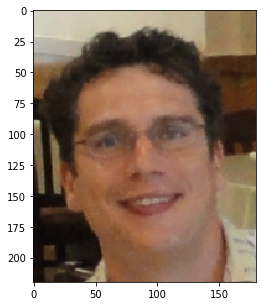

In [30]:
#import libraries
import io
from PIL import Image
import matplotlib.pyplot as plt
#allow to print images in this notebook
%matplotlib inline

#read the images as byte array, pass container and blob name
blob_bytes = blob_service.get_blob_to_bytes(NEW_CONTAINER_NAME, blob_name_list[3])

#store byte stream from object 
blob_bytes_in_memory = io.BytesIO(blob_bytes.content)

#read bytes and display image
img_bytes = Image.open(blob_bytes_in_memory)

#create figure object and plot the image
plt.figure(figsize=(5,5))
plt.imshow(img_bytes);

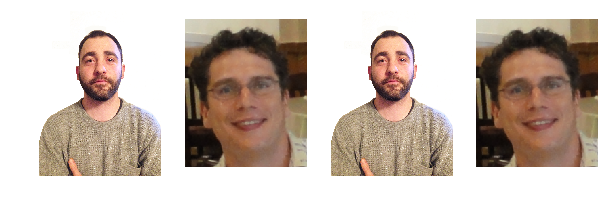

In [35]:
#list of BLOBs'name in the cloud storage
blobs = ['andrea_porelli.jpg', 'ista_zahn.png'] * 2

#plot multiple BLOBs
images_bytes = []
fig, ax = plt.subplots(1, len(blobs), figsize = (10,10))
for i, blob in enumerate(blobs):
    blob_bytes = blob_service.get_blob_to_bytes(NEW_CONTAINER_NAME, blob)
    blob_bytes_in_memory = io.BytesIO(blob_bytes.content)
    images_bytes.append(Image.open(blob_bytes_in_memory))
    ax[i].imshow(images_bytes[i])
    #turn of frame around picture
    ax[i].set_axis_off() 

In [33]:
######################################################################
#Why do we need array to display images? what is inside the blob?    #
#let us print a slice of blob content (copy paste line below to cell)#
#IN: blob_bytes.content[0:40]                                        #
#OUT: \x89PNG\\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x00\xb4\x00\x     #
#Answer: byte stream                                                 #
###################################################################### 

### Play audios
Similarly to images, you can reproduce audio contents in your notebook. As before, you just need to read audio BLOB into an array and then reproduce the audio:

- **`import IPython.display`** module to reproduce audio
- call method **`get_blob_to_bytes()`** to downloads a blob as an array of bytes 
- store bytes into local memory (use method **`blob.content`** to extract byte stream from bytes object)
- reproduce audio in the notebook

_Note: you need blob service and a list of blob, check previous paragraph if you are starting from here_

In [34]:
#import library
from IPython.display import Audio

#select audio blob name
blob_name = blob_name_list[0]

#read the images as byte array, pass container and blob name
blob_audio = blob_service.get_blob_to_bytes(NEW_CONTAINER_NAME, blob_name)

#read bytes and reproduce the audio
wav_bytes = Audio(data=blob_audio.content)
display(wav_bytes)

###  Read datasets

You can also store csv files in your cloud. Let's retrive and use it for some basic visualization. To do so you will follow to next steps:

- Call method **`make_blob_url()`** from your BlobService to retrieve the csv from the cloud storage
- **`import pandas`** library to read the data into a csv  

_Note: you need blob service and a list of blob, check previous paragraph if you are starting from here_

In [35]:
#select csv blob name
blob_name = blob_name_list[2]

#url to access data uploaded 
data_url = blob_service.make_blob_url(NEW_CONTAINER_NAME, blob_name)

In [36]:
#import library to manipulate dataframe
import pandas as pd

# read data 
data = pd.read_csv(data_url)

#set column month as index
df = data.set_index('Month')

#set new columns' name
df.columns = ['IBM', 'Amazon', 'Microsoft', 'Google']

#show first 10 rows
df.head(5)

,IBM,Amazon,Microsoft,Google
Month,,,,
2004-01,0.0,2,11,2.0
2004-02,0.0,3,11,0.5
2004-03,0.0,3,6,1.0
2004-04,0.0,3,9,1.0
2004-05,0.0,4,9,1.0


In [37]:
#####################################################################################################
#What is it the most queried cloud computing platform on google trend? It has always been like that?#
#Plot trends for each platform                                                                      #
# Answer: Look at the Graph                                                                         #
#####################################################################################################      

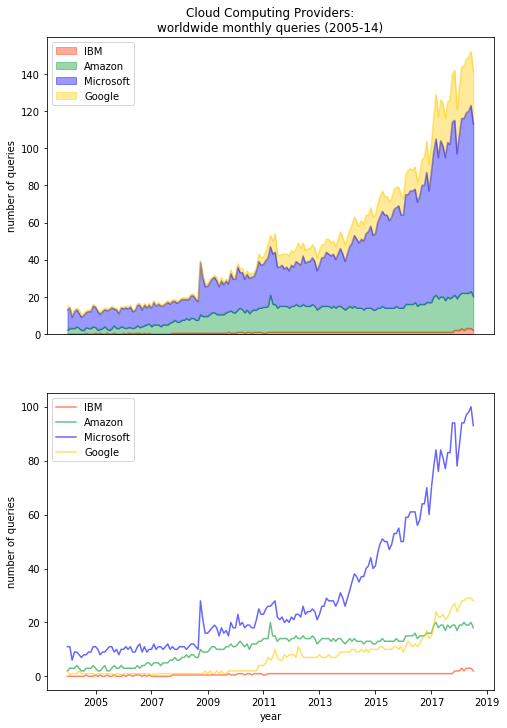

In [38]:
import matplotlib.dates as mdates
import datetime as dt

#transform months to datetime
x = [dt.datetime.strptime(d,'%Y-%m').date() for d in df.index]

#set custom colors
set_colors = ['#ff3300',  '#009933', '#0000ff', '#ffcc00']

#set number of subplots in the figure
fig, ax = plt.subplots(2, 1)

#plot trends stacked in the first subplot
df.plot(kind='area', alpha=0.4, ax=ax[0], title='Cloud Computing Providers:\nworldwide monthly queries (2005-14)',
        color = set_colors, xticks=None, stacked=True, figsize=(8,12))

#plot trends in the second subplot
for col, color in zip(df.columns, set_colors):
    ax[1].plot(x,df[col], label=col, alpha=0.6, color=color)

#set legend, and labels
plt.legend(loc='best')
plt.ylabel('number of queries')
plt.xlabel('year')
ax[0].set_ylabel('number of queries')
ax[0].axes.get_xaxis().set_visible(False)
ax[0].axes.get_xaxis().set_ticks([x])
ax[1].xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

### Delete BLOB container

Once finish poking around is a good practice to delete the container if you do not plan to use the files any soon. This reduce your storage costs but also expose you to lost of data. Make sure you have a copy of your data somewhere. By deliting the container you are going to delete all the contents.  

- Call from the BlockBlobService object the method delete_container()
- Pass the name of the container you would like to delete

Puff!

_Note: remember to instantiate BlockBlobService to communicate with storage and the correct name of the container you want to delete. You will not be able to undo delition, be careful when deliting a container and make sure to store data you need_

In [39]:
#delete container
delete_container = blob_service.delete_container(NEW_CONTAINER_NAME)
print("{} delition status success: {}".format(NEW_CONTAINER_NAME, delete_container))

myplayground delition status success: True


## Recap
### What you have learnt

- What is cloud storage and how to use it with UI and SDK
- Use the first part of the second tutorial in the experiment folder to practice what you have learnt (public_cloud_computing\experiment\features_extraction\FE.ipynb)

### What you will learn next guide

- How to use public cloud services:
    - Build your first application to use public cloud services
    - Learn how to use Face, Computer Vision ,Speech Recognition and Text Analytics Azure public cloud services using APIs

### Question for you¶

- Now that you know more about cloud, what do you think about it?
- When would it be useful in your work, research?

In [1]:
#import library to display notebook as HTML
import os
from IPython.core.display import HTML

#path to .ccs style script
cur_path = os.path.dirname(os.path.abspath("__file__"))
new_path = os.path.relpath('..\\..\\styles\\custom_styles_public_cloud_computing.css', cur_path)

#function to display notebook
def css():
    style = open(new_path, "r").read()
    return HTML(style)

In [2]:
#run this cell to apply HTML style
css()